groupby:先对数据分组，然后在每个分组上应用聚合函数、转换函数
本次演示：
    1. 分组使用聚合函数做数据统计
    2. 遍历groupby的结果理解执行流程
    3. 实例分组探索天气数据

In [3]:
import numpy as np
import pandas as pd
# 加上这一句，能在jupyter notebook展示matployt图表
%matplotlib inline

In [4]:
df=pd.DataFrame(
    {'A':['foo','bar','foo','bar','foo','bar','foo','foo'],
     'B':['one','one','two','three','two','two','one','three'],
     'C':np.random.randn(8),
     'D':np.random.randn(8)
     }
)
df

,A,B,C,D
0,foo,one,-0.506762,0.058196
1,bar,one,0.798531,1.543067
2,foo,two,-1.242745,-1.276530
3,bar,three,-0.630844,0.245737
4,foo,two,-1.037689,-1.086677
5,bar,two,0.575786,-0.060435
6,foo,one,-0.779475,0.600724
7,foo,three,-0.681966,0.321145


一、分组使用聚合函数做数据统计

1. 单个列groupby，查询所有数据列的统计

In [8]:
df.groupby('A').sum()

C:\Users\xiaom\AppData\Local\Temp\ipykernel_17276\1885751491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('A').sum()


,C,D
A,,
bar,0.743473,1.728369
foo,-4.248638,-1.383141


我们看到：
    1. groupby中的'A'变成了数据的索引列
    2. 因为要统计sum，但B列不是数字，自动忽略

2. 多个列groupby，查询所有数据列的统计

In [9]:
df.groupby(['A','B']).mean()

C         D
A   B                        
bar one    0.798531  1.543067
    three -0.630844  0.245737
    two    0.575786 -0.060435
foo one   -0.643118  0.329460
    three -0.681966  0.321145
    two   -1.140217 -1.181604

我们看到：('A','B')成对变成了二级索引

In [10]:
df.groupby(['A','B'],as_index=False).mean()

,A,B,C,D
0,bar,one,0.798531,1.543067
1,bar,three,-0.630844,0.245737
2,bar,two,0.575786,-0.060435
3,foo,one,-0.643118,0.329460
4,foo,three,-0.681966,0.321145
5,foo,two,-1.140217,-1.181604


3. 同时查看多种数据统计

In [11]:
df.groupby('A').agg([np.sum,np.mean,np.std])

C:\Users\xiaom\AppData\Local\Temp\ipykernel_17276\692273180.py:1: FutureWarning: ['B'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('A').agg([np.sum,np.mean,np.std])


C                             D                    
          sum      mean       std       sum      mean       std
A                                                              
bar  0.743473  0.247824  0.769056  1.728369  0.576123  0.851276
foo -4.248638 -0.849728  0.291761 -1.383141 -0.276628  0.850760

4. 查看单列结果的数据统计

In [12]:
# 方法1：预过滤，性能更好
df.groupby('A')['C'].agg([np.sum,np.mean,np.std])

,sum,mean,std
A,,,
bar,0.743473,0.247824,0.769056
foo,-4.248638,-0.849728,0.291761


In [13]:
# 方法2
df.groupby('A').agg([np.sum,np.mean,np.std])['C']

C:\Users\xiaom\AppData\Local\Temp\ipykernel_17276\633571098.py:2: FutureWarning: ['B'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('A').agg([np.sum,np.mean,np.std])['C']


,sum,mean,std
A,,,
bar,0.743473,0.247824,0.769056
foo,-4.248638,-0.849728,0.291761


5. 不同列使用不同的聚合函数

In [14]:
df.groupby('A').agg({'C':np.mean,'D':np.sum})

,C,D
A,,
bar,0.247824,1.728369
foo,-0.849728,-1.383141


二、遍历groupby结果理解执行流程 

for循环可以直接遍历每个group

1. 遍历单个列聚合的分组

In [15]:
g=df.groupby('A')
g

In [18]:
for name,group in g:
    print('name:',name)
    print('group:')
    print(group)
    print()

name: bar
group:
     A      B         C         D
1  bar    one  0.798531  1.543067
3  bar  three -0.630844  0.245737
5  bar    two  0.575786 -0.060435

name: foo
group:
     A      B         C         D
0  foo    one -0.506762  0.058196
2  foo    two -1.242745 -1.276530
4  foo    two -1.037689 -1.086677
6  foo    one -0.779475  0.600724
7  foo  three -0.681966  0.321145



可以获取单个分组的数据

In [19]:
g.get_group('foo')

,A,B,C,D
0,foo,one,-0.506762,0.058196
2,foo,two,-1.242745,-1.276530
4,foo,two,-1.037689,-1.086677
6,foo,one,-0.779475,0.600724
7,foo,three,-0.681966,0.321145


2. 遍历多个列聚合的分组

In [20]:
h=df.groupby(['A','B'])

In [23]:
for name,group in h:
    print('name:',name)
    print('group:')
    print(group)
    print()

name: ('bar', 'one')
group:
     A    B         C         D
1  bar  one  0.798531  1.543067

name: ('bar', 'three')
group:
     A      B         C         D
3  bar  three -0.630844  0.245737

name: ('bar', 'two')
group:
     A    B         C         D
5  bar  two  0.575786 -0.060435

name: ('foo', 'one')
group:
     A    B         C         D
0  foo  one -0.506762  0.058196
6  foo  one -0.779475  0.600724

name: ('foo', 'three')
group:
     A      B         C         D
7  foo  three -0.681966  0.321145

name: ('foo', 'two')
group:
     A    B         C         D
2  foo  two -1.242745 -1.276530
4  foo  two -1.037689 -1.086677



可以看到，name是一个两个元素的元组，代表不同的列

In [24]:
h.get_group(('foo', 'three'))

,A,B,C,D
7,foo,three,-0.681966,0.321145


其实所有的聚合统计，都是在df或者series上进行的

三、实例分组探索天气数据

In [28]:
df_w=pd.read_csv('./data/weather/seattle-weather.csv',sep=',')
# 数据集来自kaggle：https://www.kaggle.com/datasets/ananthr1/weather-prediction

In [29]:
df_w.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [30]:
df_w.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

In [31]:
# 新增一列 月份
df_w['month']=df_w['date'].str[:7]
df_w.head()

,date,precipitation,temp_max,temp_min,wind,weather,month
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,2012-01
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2012-01
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2012-01
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2012-01
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2012-01


1. 查看每个月的最大温度

In [36]:
data=df_w.groupby('month')['temp_max'].max()
type(data)

pandas.core.series.Series

<Axes: xlabel='month'>

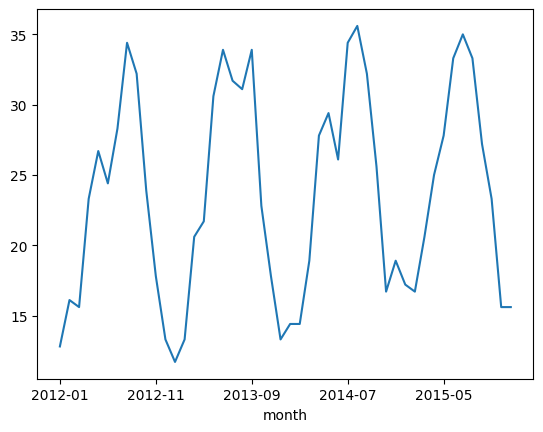

In [37]:
data.plot()

2. 查看每个月的最高温度、最低温度和风力等级

In [38]:
datas=df_w.groupby('month').agg({'temp_max':np.max,'temp_min':np.min,'wind':np.mean})

<Axes: xlabel='month'>

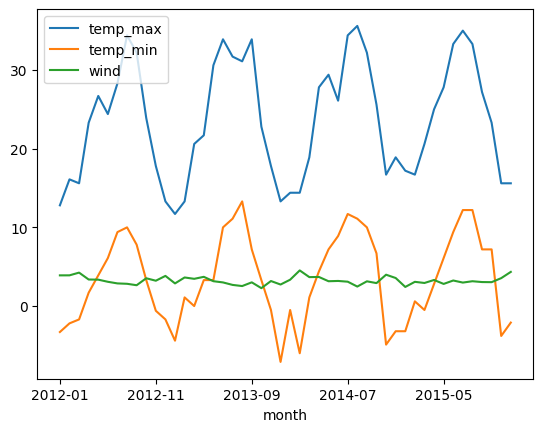

In [39]:
datas.plot()